In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output

In [2]:
os.chdir('..')

In [3]:
import os, sys
from importlib import reload
from matplotlib import pyplot as plt
from tqdm import tqdm
import networkx as nx
import ep_finder, lep_finder, graphs, ep_utils

In [4]:
reload(graphs)

<module 'graphs' from '/Users/josephhenderson/Desktop/Research/EquitablePartitions/graphs.py'>

In [4]:
graph = nx.random_geometric_graph(200,.1)

In [5]:
relabeledGraph = graphs.relabel(graph)

In [7]:
ep_dict, lep_dict = ep_utils.getEquitablePartitions(relabeledGraph,progress_bars=False)
nontrivEp_dict, nontrivLep_list,hist_list,perc = graphs.NontrivialityData(relabeledGraph,ep_dict,lep_dict,return_vals=True,plot=False,show_progress=True,verbose=True)


Nontrivial nodes progress:24/25
Total percentage on nontrivial nodes: 0.25
Total pairs in partition elements: 25
Percentage of nontrivial nodes in pairs: 1.0


# Random Geometric Graphs Analysis

In [13]:
# get X,Y base

nodes = np.linspace(10,100,10)
radii = np.linspace(0,1.35,21)

X, Y = np.meshgrid(nodes,radii)
print(nodes)

[ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


In [10]:
percent_non_trivial = np.zeros((21, 10))
trials=25
for t in range(trials):
    for i, rad in enumerate(radii):
    #     clear_output()
        print("\r" + str(trials-t) + "   ", end="")
        for j, nod in enumerate(nodes):
            graph = graphs.relabel(nx.random_geometric_graph(int(nod), rad))
            ep_dict, lep_dict = ep_utils.getEquitablePartitions(graph,progress_bars=False)
            _,_,_,perc = graphs.NontrivialityData(graph,ep_dict,lep_dict,return_vals=True,plot=False,show_progress=False,verbose=False)
            percent_non_trivial[i][j] += perc

percent_non_trivial /= trials

1    

In [13]:
#percent_non_trivial

<IPython.core.display.Javascript object>


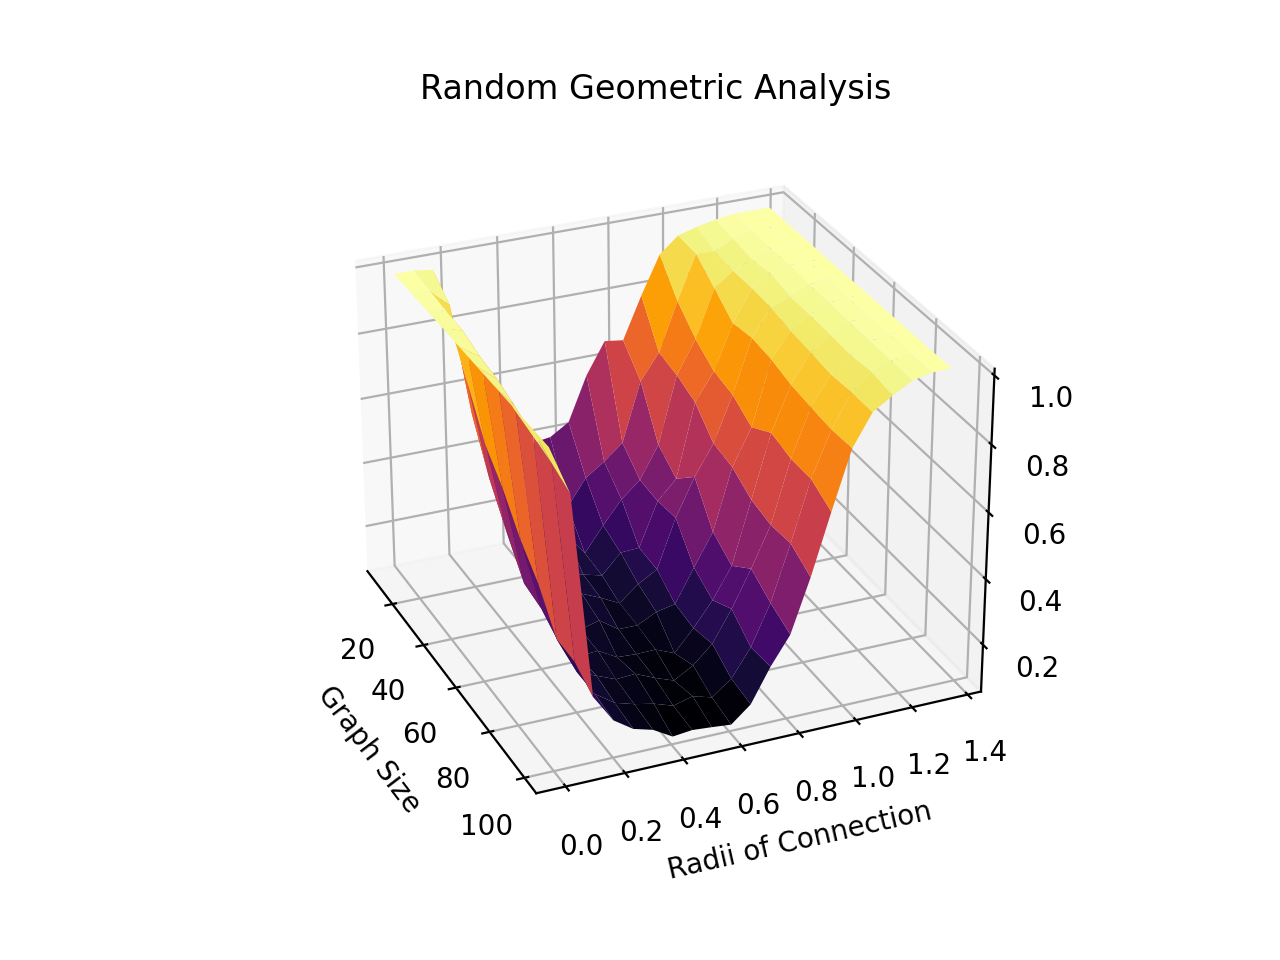

In [26]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,percent_non_trivial,cmap='inferno')
plt.title("Random Geometric Analysis")
ax.set_xlabel("Graph Size")
ax.set_ylabel("Radii of Connection")
plt.show()

# Albert Barabasi Analysis

In [14]:
nodes_barabas = np.linspace(10,100,10)
numNodes = np.arange(1,10)

X_b, Y_b = np.meshgrid(nodes_barabas,numNodes)
print(X.shape)

(21, 10)


In [15]:


percent_non_trivial_barabas = np.zeros(X_b.shape)
trials=5
for t in range(trials):
    for i, m in enumerate(numNodes):
    #     clear_output()
        print("\r" + str(trials-t) + "   ", end="")
        for j, nod in enumerate(nodes):
            graph = graphs.relabel(nx.barabasi_albert_graph(int(nod),int(m)))
            ep_dict, lep_dict = ep_utils.getEquitablePartitions(graph,progress_bars=False)
            _,_,_,perc = graphs.NontrivialityData(graph,ep_dict,lep_dict,return_vals=True,plot=False,show_progress=False,verbose=False)
            percent_non_trivial_barabas[i][j] += perc

percent_non_trivial_barabas /= trials

1   

<IPython.core.display.Javascript object>


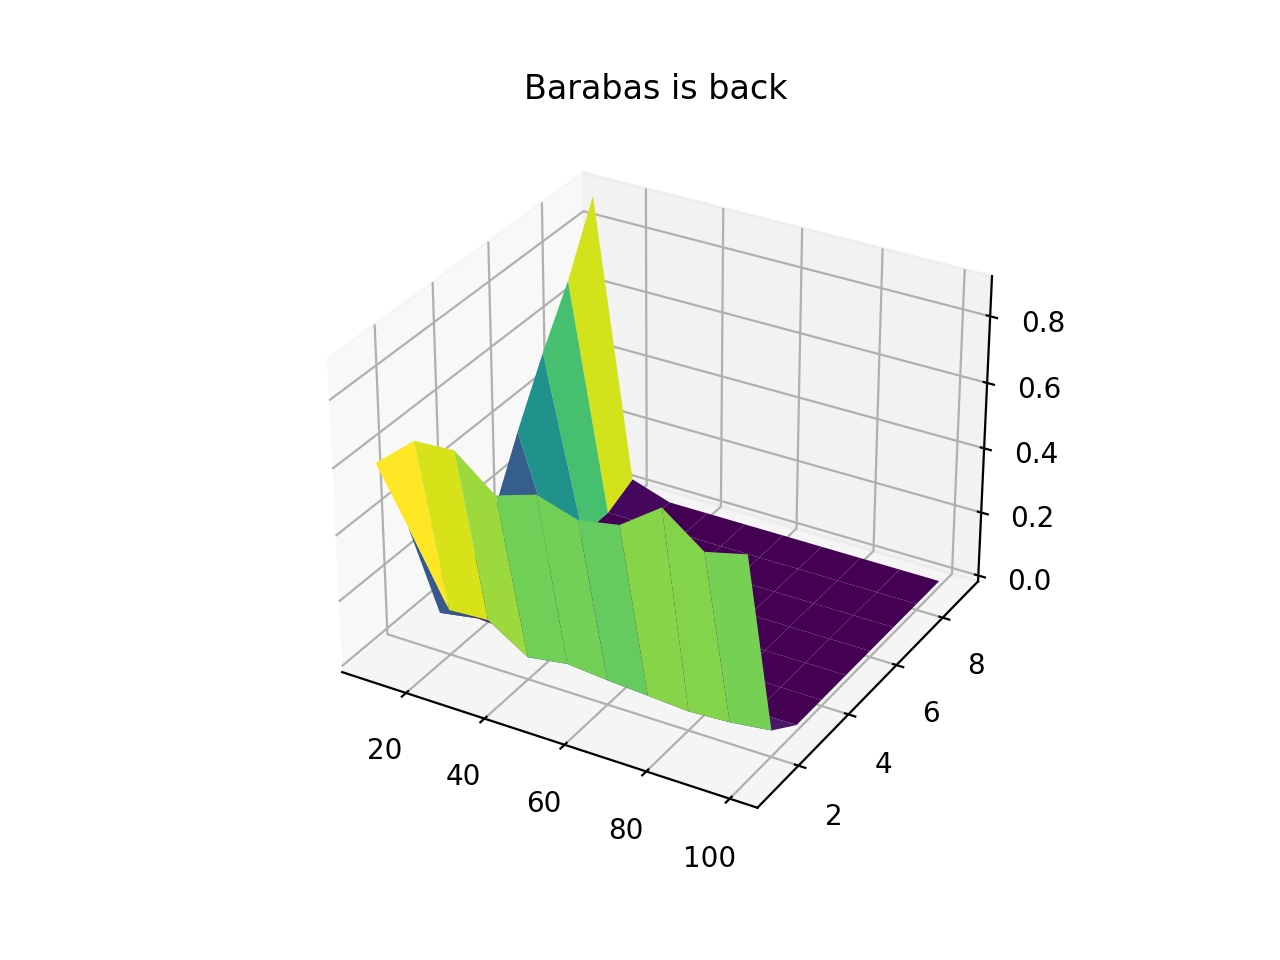

In [16]:
%matplotlib notebook
plt.ion()
fig_barabas = plt.figure()
ax_barabas = fig_barabas.add_subplot(111,projection='3d')
ax_barabas.plot_surface(X_b,Y_b,percent_non_trivial_barabas,cmap='viridis')
plt.title("Barabas is back")
plt.show()

# Erdis Reyni Analysis

In [4]:
nodes_erdis = np.linspace(10,200,20)
p = np.linspace(0,1,25)

X_be, Y_be = np.meshgrid(nodes_erdis,p)

In [6]:


percent_non_trivial_erdos = np.zeros(X_be.shape)
trials=5
print("got here")
for t in range(trials):
    for i,p_i in enumerate(p):
        clear_output(wait=True)
        print(f"trial: {t+1} of {trials}, probability: {i/len(p)}",sep='\r')
        for j, nod in enumerate(nodes_erdis):
            graph = graphs.relabel(nx.erdos_renyi_graph(int(nod),p_i))
            ep_dict, lep_dict = ep_utils.getEquitablePartitions(graph,progress_bars=False)
            _,_,_,perc = graphs.NontrivialityData(graph,ep_dict,lep_dict,return_vals=True,plot=False,show_progress=False,verbose=False)
            percent_non_trivial_erdos[i][j] += perc

percent_non_trivial_erdos /= trials

trial: 5 of 5, probability: 0.96


<IPython.core.display.Javascript object>


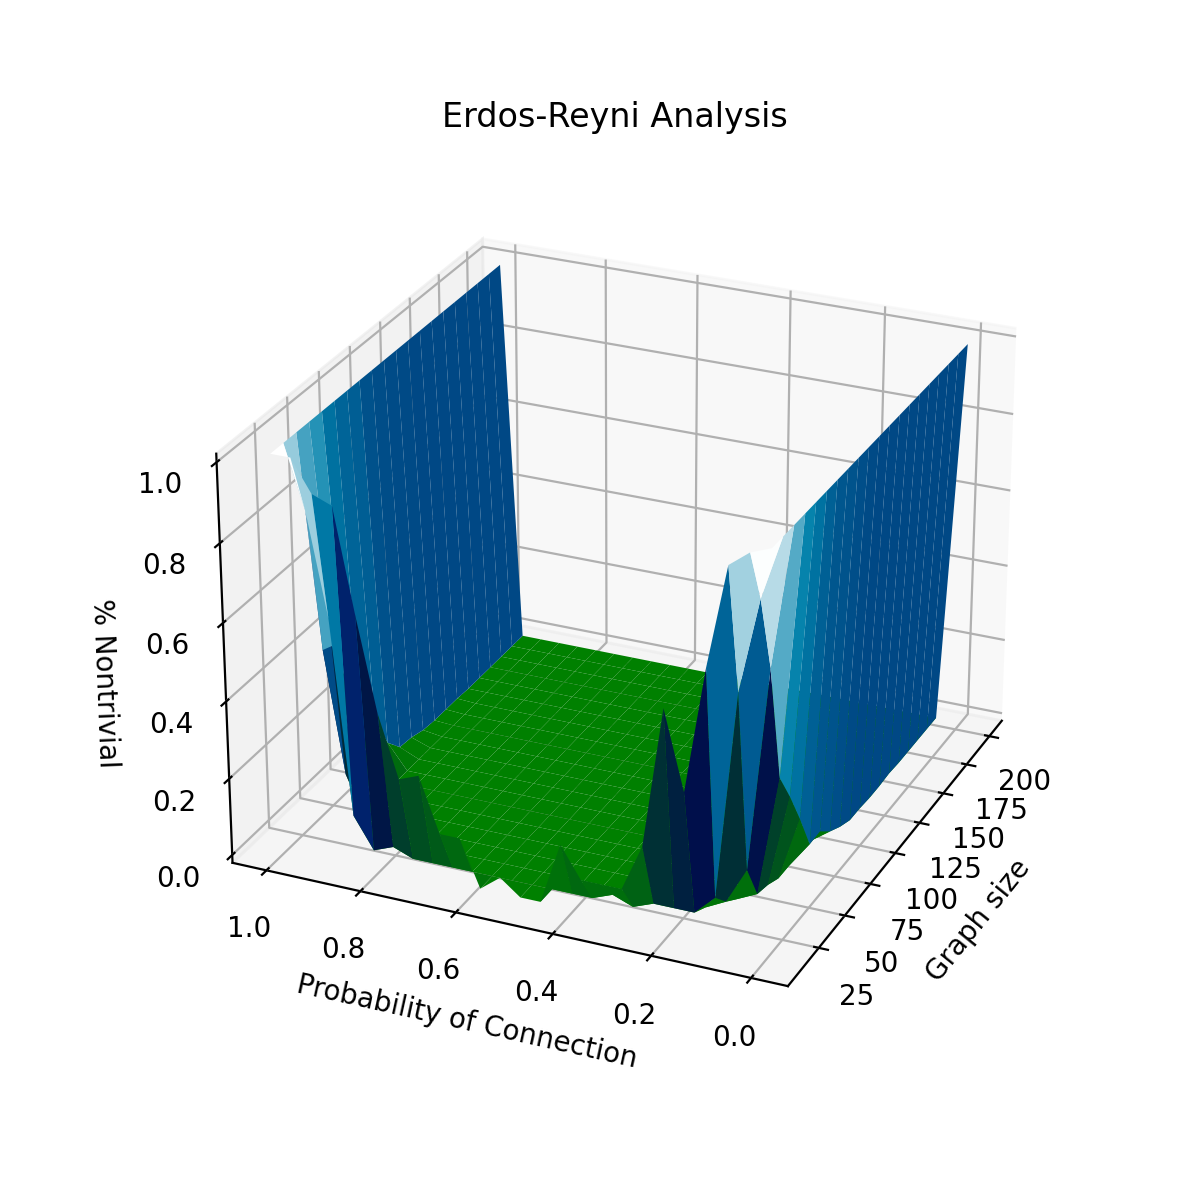

Text(0.5, 0.92, 'Erdos-Reyni Analysis')

In [9]:
%matplotlib notebook
fig_e = plt.figure(figsize=(6,6))
ax_e = fig_e.add_subplot(projection='3d')
ax_e.plot_surface(X_be,Y_be,percent_non_trivial_erdos,cmap='ocean')
ax_e.set_ylabel("Probability of Connection")
ax_e.set_xlabel("Graph size")
ax_e.set_zlabel("% Nontrivial")
ax_e.set_title("Erdos-Reyni Analysis")

<IPython.core.display.Javascript object>


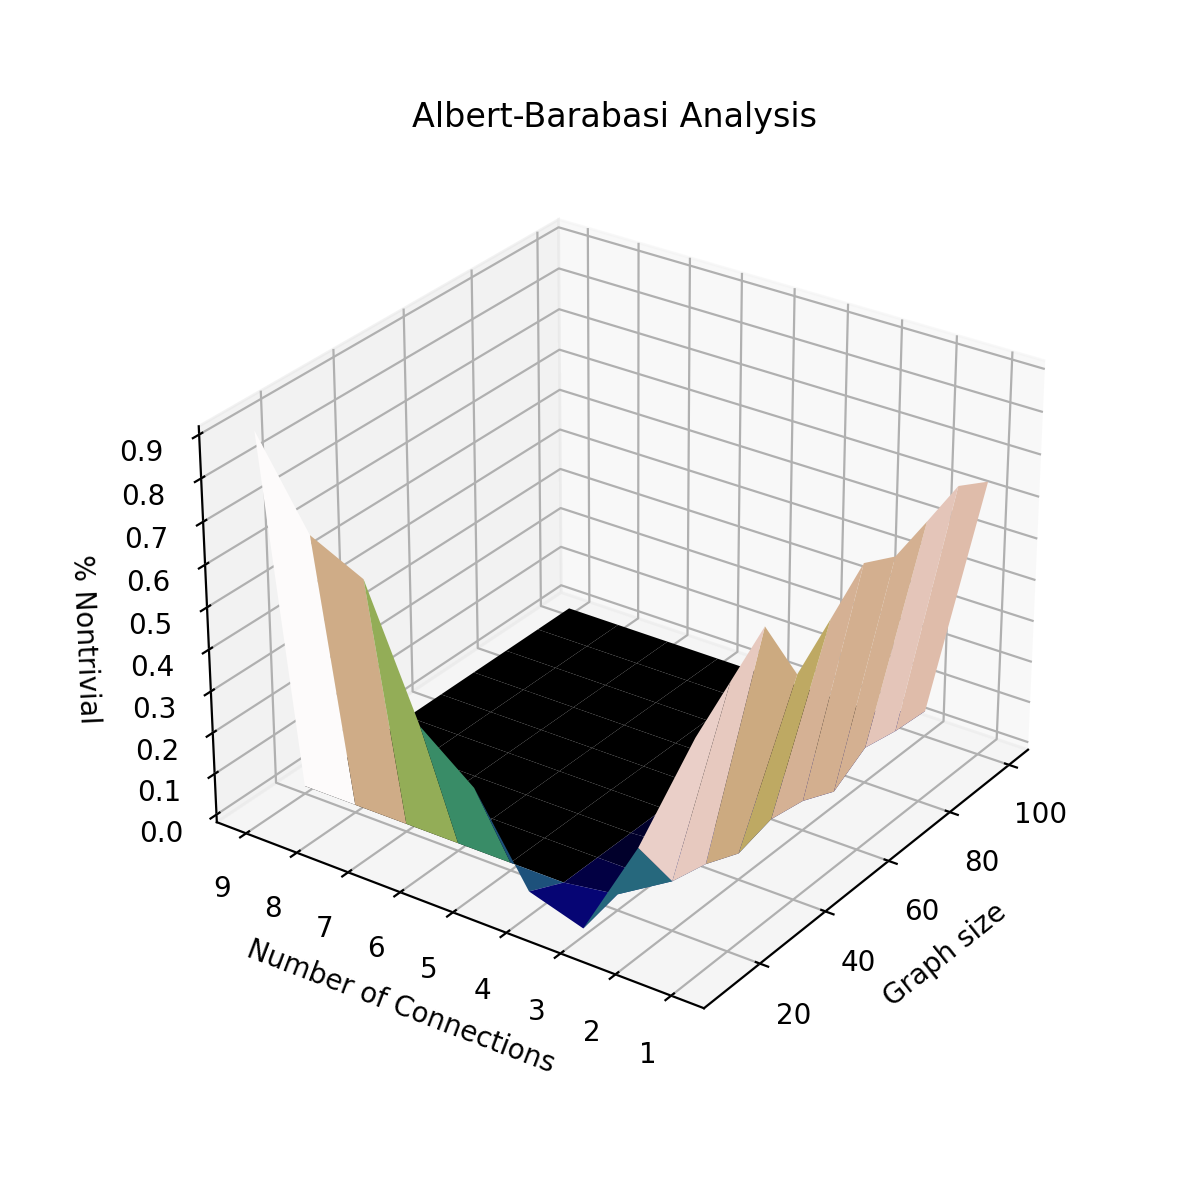

Text(0.5, 0.92, 'Albert-Barabasi Analysis')

In [17]:
fig_e = plt.figure(figsize=(6,6))
ax_e = fig_e.add_subplot(projection='3d')
ax_e.plot_surface(X_b,Y_b,percent_non_trivial_barabas,cmap='gist_earth')
ax_e.set_ylabel("Number of Connections")
ax_e.set_xlabel("Graph size")
ax_e.set_zlabel("% Nontrivial")
ax_e.set_title("Albert-Barabasi Analysis")

<IPython.core.display.Javascript object>


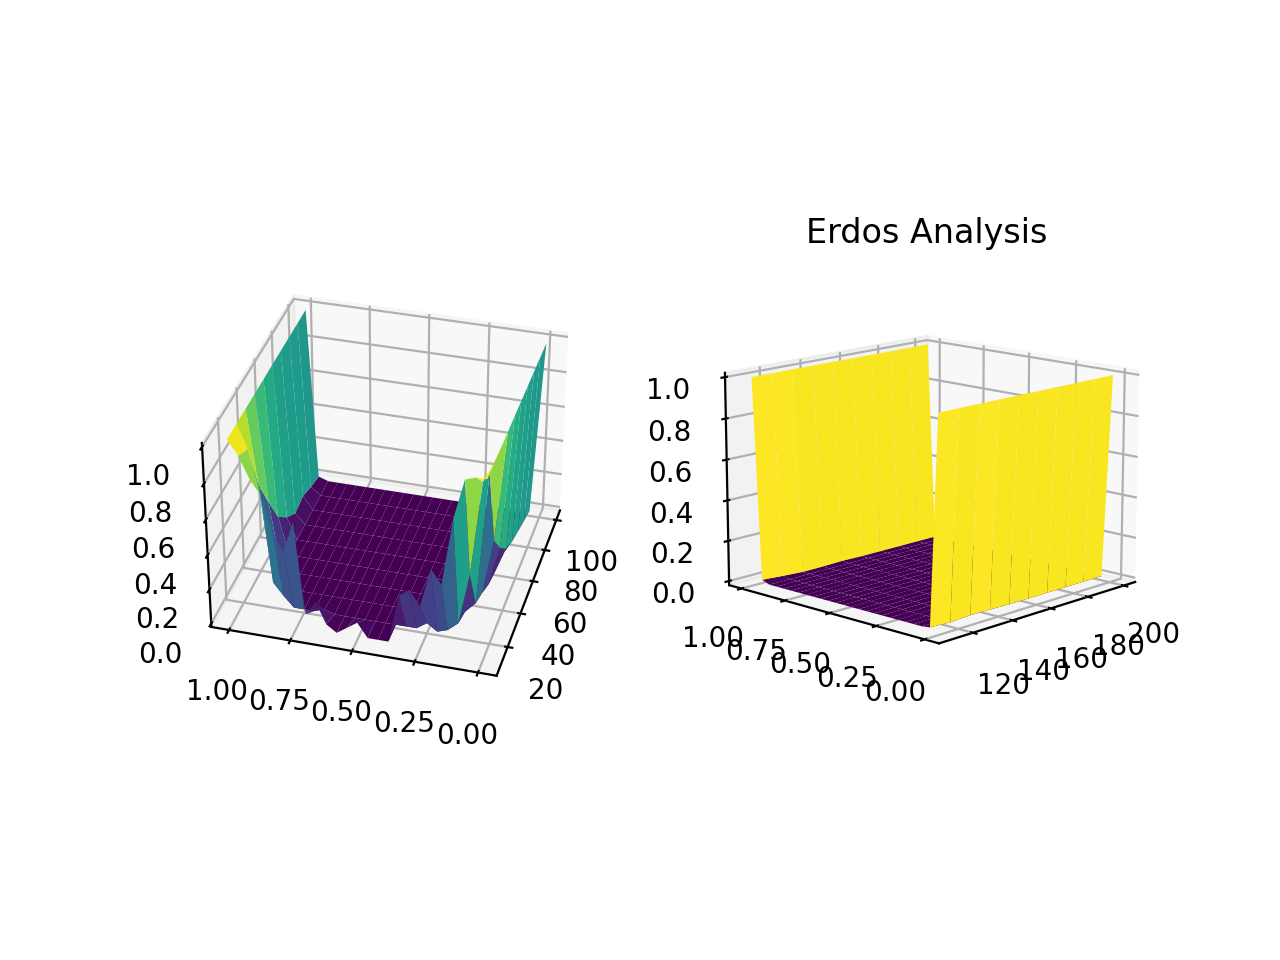

In [14]:
%matplotlib notebook
plt.ion()
fig_erdos = plt.figure()
ax_erdos = fig_erdos.add_subplot(121,projection='3d')
ax_erdos2 = fig_erdos.add_subplot(122,projection='3d')
ax_erdos.plot_surface(X_b[:,:10],Y_b[:,:10],percent_non_trivial_erdos[:,:10],cmap='viridis')
ax_erdos2.plot_surface(X_b[:,10:20],Y_b[:,10:20],percent_non_trivial_erdos[:,10:20],cmap='viridis')
plt.title("Erdos Analysis")
plt.show()